# 1. Libraries Importing
To begin our exploration, we import Libraries for (Visual) Illustration and Machine Learning

In [174]:
import pandas as pd                  
import numpy as np
import time
# visual libraries
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')
# sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve

# from sklearn.externals import joblib
# error fix: only need to 'import joblib' instead of 'from sklearn.externals'  
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# error fix: import additional library 'gridspec'
from matplotlib import gridspec

# 2. Data Importing
Next step, we import dataset Credit Card Fraud Detection from Kaggle: https://www.kaggle.com/mlg-ulb/creditcardfraud


In [175]:
# import downloaded dataset from Kaggle
df = pd.read_csv('creditcard.csv')
# display first 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [176]:
# checking the shape of data
df.shape

(284807, 31)

The data set has 284807 entries (rows) and 31 features (columns), 28 of which have been anonymized and are labeled V1 through V28. The remaining three features are the time and the amount of the transaction as well as whether that transaction was fraudulent or not.

# 3. Data Preprocessing and Cleaning
    In this step, we will preprocess the data to have the first understanding of it:
    a. Handling missing values
    b. Labelling necessary data 
    c. Visualizing labelled data

### a. Handling missing values

In [177]:
# checking if any missing 'NULL' values
df.isnull().any().sum()

0

Since there are no missing values found in the dataset, we don't have to use any missing values handling techniques 

### b. Labelling necessary data 
    We will set labels to the column 'Class': 
    1s: fraud
    0s: no fraud


In [178]:
All = df.shape[0]
# label 'Class' column
fraud = df[df['Class'] == 1]
nonFraud = df[df['Class'] == 0]

Then we calculate the percentage of frauds and non frauds transactions:

In [179]:
# calculate x as % of fraud transactions
x = len(fraud)/All
#calculate y as % of non fraud transactions
y = len(nonFraud)/All
# display the result
print('frauds :',x*100,'%')
print('non frauds :',y*100,'%')

frauds : 0.1727485630620034 %
non frauds : 99.82725143693798 %


### c. Visualizing labelled data
After that, we visualize transaction class distribution by a bar graph

Text(0, 0.5, 'Frequency')

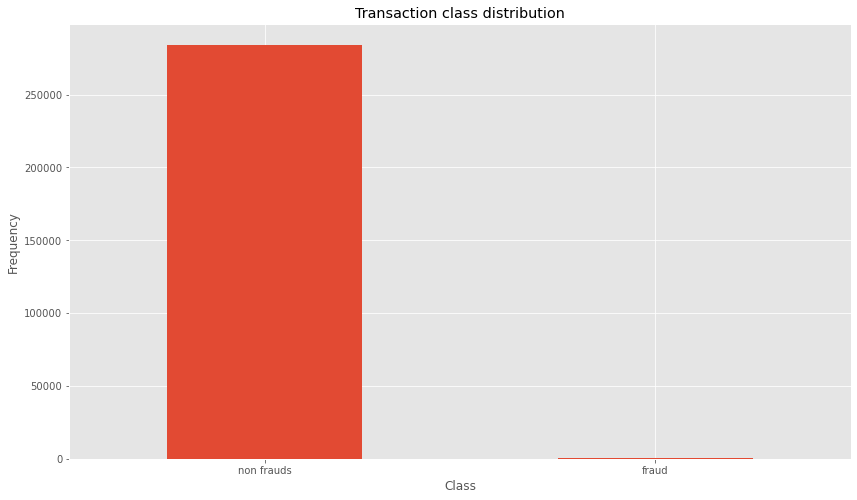

In [180]:
# create label variable with 2 values non frauds and fraud
labels = ['non frauds','fraud']
classes = pd.value_counts(df['Class'], sort = True)
# creating the plot
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

As our observation, we originally have 2 imbalanced classes

# 4. Data Visualization

    In this step, we will show:
    a. The distribution of 'Amount' column using distplot()
    b. The distribution of 'Time' column using distplot()
    c. The histograms of 28 anonymized features
    d. The correlation matrix as a heatmap

### a. Visualizing the distribution of 'Amount' column

/Users/anhnguyen/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

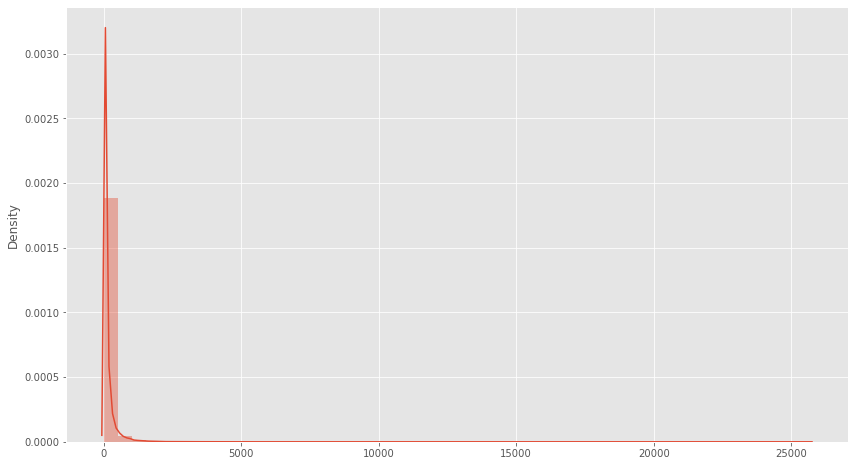

In [181]:
# distribution of Amount
amount = [df['Amount'].values]
sns.distplot(amount)

### b. Visualizing the distribution of 'Time' column

/Users/anhnguyen/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

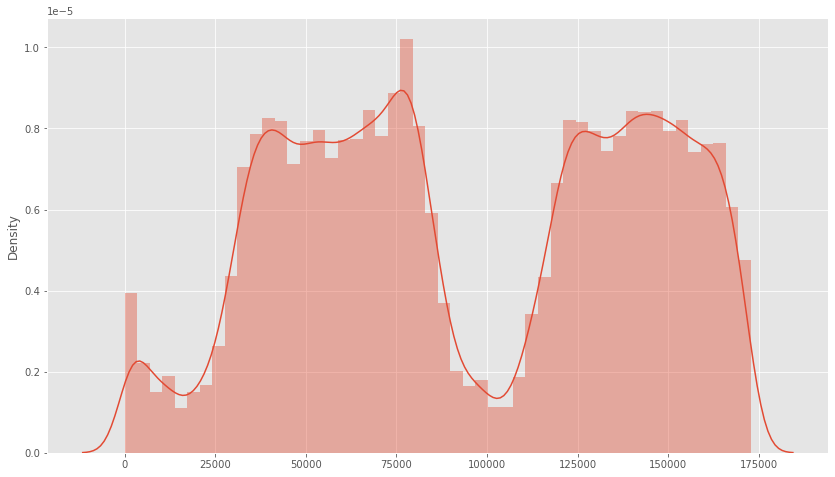

In [182]:
# distribution of Time
time = df['Time'].values
sns.distplot(time)

### c. Visualizing the histograms of 28 anonymized features

/Users/anhnguyen/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/anhnguyen/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/anhnguyen/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

/Users/anhnguyen/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/anhnguyen/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/anhnguyen/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

/Users/anhnguyen/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/anhnguyen/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/anhnguyen/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

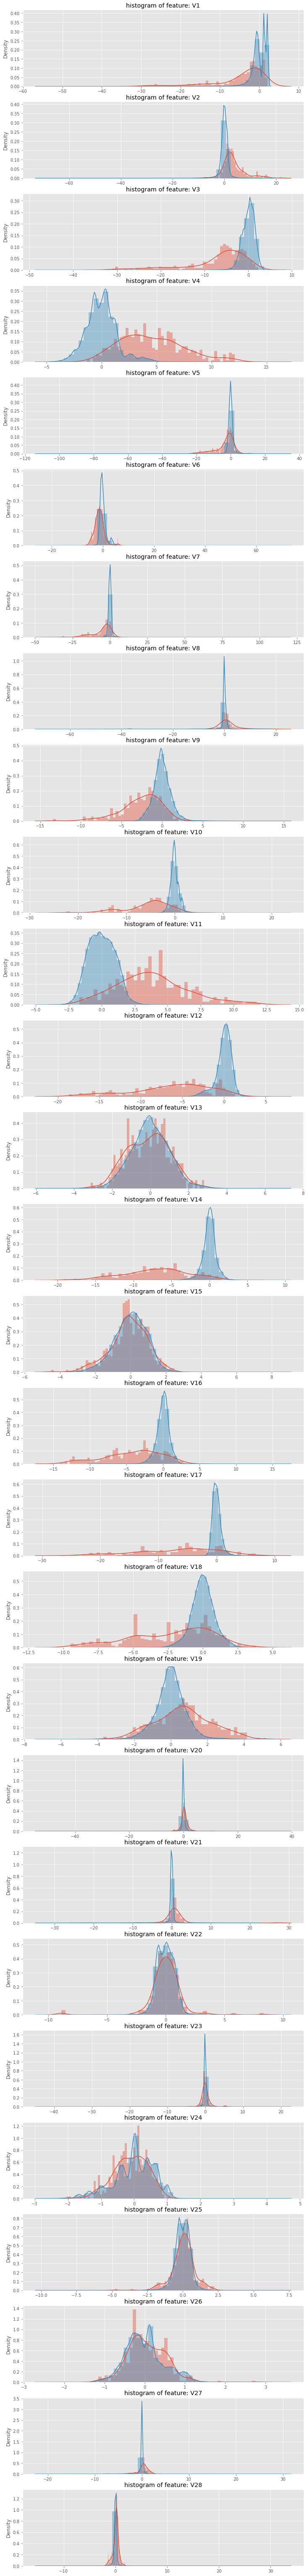

In [183]:
# define anomalous features (columns)
anomalous_features = df.iloc[:,1:29].columns

plt.figure(figsize=(12,28*4))
#error fix: import additional library 'gridspec' at the beginning
gs = gridspec.GridSpec(28, 1)
# for loop to display each histogram of V1 to V28
# error fix: fixed indentation in for loop implementation 
for i, cn in enumerate(df[anomalous_features]):
 ax = plt.subplot(gs[i])
 sns.distplot(df[cn][df.Class == 1], bins=50)
 sns.distplot(df[cn][df.Class == 0], bins=50)
 ax.set_xlabel('')
 ax.set_title('histogram of feature: ' + str(cn))
plt.show()

### d. Visualizing the correlation matrix as a heatmap

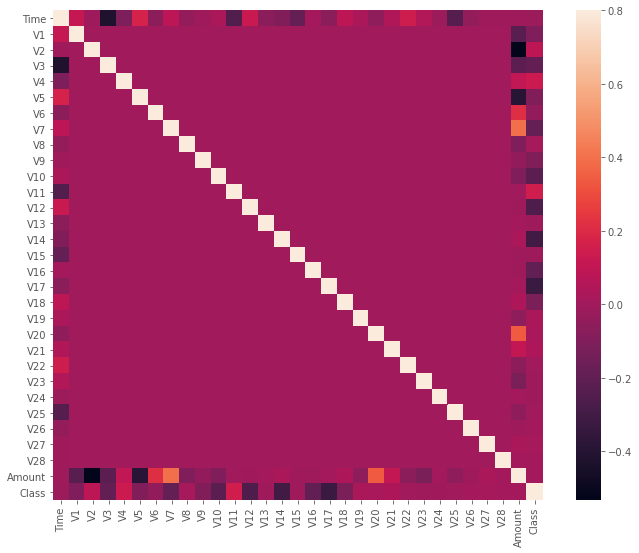

In [185]:
# obtain correlation matrix of the dataset
correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
# heatmap
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

# 5. Data Standardization (Scaling)
    The dataset is contains only numerical input variables which are the result of a PCA transformation.
    Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are ‘Time’ and ‘Amount’.
    PCA is effected by scale so we need to scale the features in the data before applying PCA. 
    For the scaling, we use Scikit-learn’s StandardScaler():
    In order to fit to the scaler the data should be reshaped within: -1 and 1
    mean 0
    variance 1



In [186]:
# standardize the data in 'Amount' and 'Time' column
# create 'Vamount' column for standardized 'Amount'
df['Vamount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
# create 'Vtime' column for standardized 'Time'
df['Vtime'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))

# new dataframe without 'Time' and 'Amount' columns
df = df.drop(['Time','Amount'], axis = 1)
df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Vamount,Vtime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


# 6. Data Transformation
    a. Principal component analysis (PCA)
    b. Handling imbalanced class distribution

### a. Principal component analysis (PCA)

In [187]:
# create X includes all columns (features) except the targeted column (feature)
X = df.drop(['Class'], axis = 1)
#create Y as the targeted column (feature)
y = df['Class']

# error fix: adjusting spacing and indentation from the original
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X.values)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Class
0,1.571626,-0.675555,0
1,-1.086205,-0.282663,0
2,2.053372,1.077454,0
3,1.150120,-0.427567,0
4,1.143847,-1.342118,0


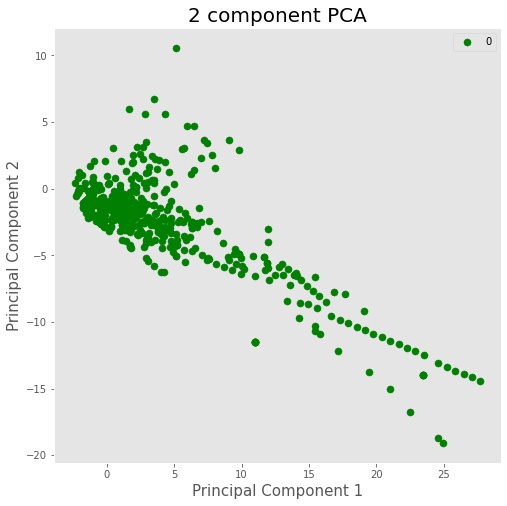

In [188]:
# 2D visualization
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

### b. Handling imbalanced class distribution
    Based on our understanding, creating a training data set that will allow our algorithms to pick up the specific characteristics that make a transaction more or less likely to be fraudulent. Using the original data set would not prove to be a good idea for a very simple reason: Since over 99% of our transactions are non-fraudulent, an algorithm that always predicts that the transaction is non-fraudulent would achieve an accuracy higher than 99%. Nevertheless, that is the opposite of what we want. We do not want a 99% accuracy that is achieved by never labeling a transaction as fraudulent, we want to detect fraudulent transactions and label them as such.
    Therefore, in this case we have to handle imbalanced class distribution by subsampling

Text(0, 0.5, 'Frequency')

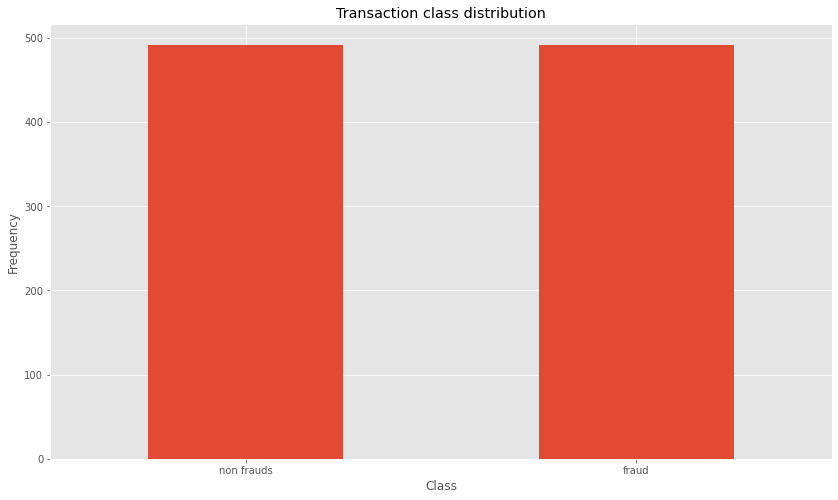

In [215]:
# shuffle the data before creating the subsamples
df = df.sample(frac=1)
 
frauds = df[df['Class'] == 1]
non_frauds = df[df['Class'] == 0][:492]
 
new_df = pd.concat([non_frauds, frauds])
# shuffle dataframe rows
new_df = new_df.sample(frac=1, random_state=42)
# plot the Transaction class against the Frequency
labels = ['non frauds','fraud']
classes = pd.value_counts(new_df['Class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")


As our observation, we now obtain 2 balanced classes

In [216]:
# prepare the data
features = new_df.drop(['Class'], axis = 1)
labels = pd.DataFrame(new_df['Class'])
 
feature_array = features.values
label_array = labels.values

# 7. Applying Machine Learning model (KNN) 

### Splitting the data

In [236]:
# split data to 80% training set and 20% testing set 
X_train,X_test,y_train,y_test = train_test_split(feature_array,label_array,test_size=0.20)
# normalizing data 
X_train = normalize(X_train)
X_test=normalize(X_test)

### Applying K-Nearest Neighbors:
    a. Choosing the best k-value
    b. Building the ML model with the chosen best k-value
    c. Model Evaluation

### a. Choosing the best k-value

In [237]:
# choose the range of neighbours from 1 to 25
neighbours = np.arange(1,25)
train_accuracy =np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

# for loop to calculate the training and testing accuracy with n neighbours in defined range
#error fix: fixed indentation in for loop implementation
for i,k in enumerate(neighbours):
 knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)
 
 knn.fit(X_train,y_train.ravel())
 
 train_accuracy[i] = knn.score(X_train, y_train.ravel())
 
 test_accuracy[i] = knn.score(X_test, y_test.ravel())

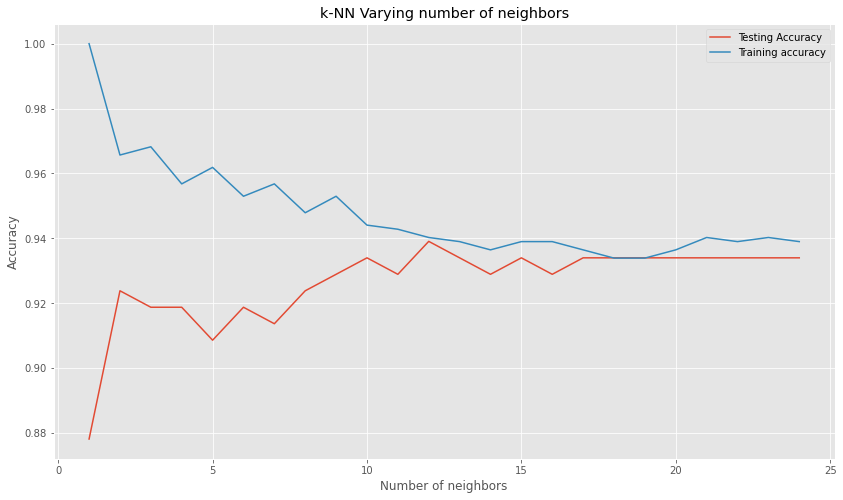

In [238]:
# visualize by plotting 2 curves of training and testing accuracy    
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours, test_accuracy, label='Testing Accuracy')
plt.plot(neighbours, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

As our observation, in general, we would pick the best k-value to be the value where two curves have the minimum discrepancy, and also have the best accuracy of both.

In [239]:
# find and check the best k-value
idx = np.where(test_accuracy == max(test_accuracy))
x = neighbours[idx]
#display the result
print(x[0])

12


### b. Building the ML model with the chosen best k-value

In [240]:
# build the ML model using Scikit-learn KNeighborsClassifier()
import time
#addition fix: computation time
time_start = time.clock()
knn=KNeighborsClassifier(n_neighbors=x[0],algorithm="kd_tree",n_jobs=-1)
knn.fit(X_train,y_train.ravel())
 
filename = 'finalized_model.sav'
joblib.dump(knn, filename)
# load the model from disk
knn = joblib.load(filename)

/Users/anhnguyen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


In [241]:
# predict the labels for the testing set using predict()
knn_predicted_test_labels=knn.predict(X_test)
time_elapsed = (time.clock() - time_start)
#display computation time
print(time_elapsed)

0.043924000000060914


/Users/anhnguyen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


### c. Model Evaluation

Model Accuracy Score: 0.9390862944162437
Model Precison Score: 0.9512195121951219
Model Recall Score: 0.9069767441860465
Model F1 score: 0.9285714285714286
Model Matthews Correlation Coefficient: 0.8762811283257987


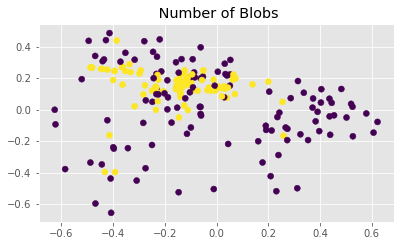

In [242]:
from pylab import rcParams
# plotting number of blobs
rcParams['figure.figsize'] = 14, 8
plt.subplot(222)
plt.scatter(X_test[:, 0], X_test[:, 1], c=knn_predicted_test_labels)
plt.title(" Number of Blobs")

# calculate results
knn_accuracy_score  = accuracy_score(y_test,knn_predicted_test_labels)
knn_precison_score  = precision_score(y_test,knn_predicted_test_labels)
knn_recall_score    = recall_score(y_test,knn_predicted_test_labels)
knn_f1_score        = f1_score(y_test,knn_predicted_test_labels)
knn_MCC             =    matthews_corrcoef(y_test,knn_predicted_test_labels)

# addition fix: display all the results
print("Model Accuracy Score:", knn_accuracy_score)
print("Model Precison Score:", knn_precison_score)
print("Model Recall Score:", knn_recall_score)
print("Model F1 score:", knn_f1_score)
print("Model Matthews Correlation Coefficient:", knn_MCC)

In conclusion, the results we obtain above show that in this case, our model have a fairly good perfomance with fairly high scores in all Accuracy Score, Precison Score, Recall Score, F1 score and Matthews Correlation Coefficient. The computation time of building and predicting by our model is 0.04 ms using my laptop (the specs of the laptop can be shown later if needed). However, we cannot conclude it is the best model yet since there are still room for improvement in performance. In my opinion, fraud detection is a complex issue that requires a substantial amount of planning before throwing machine learning algorithms at it. Nonetheless, it is also an application of data science and machine learning for the good, which makes sure that the customer’s money is safe and not easily tampered with. In the future, I believe performance improvement could be achieved through developing a fraud detection model using a combination of different algorithm and approaches. 